# Décodage d'une formule de pricing

Le challenge consiste à déterminer l’équation ou l’algorithme permettant de calculer les prix d’une couverture d’assurance automobile.

https://www.datascience.net/fr/challenge/26/details

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Train data

In [2]:
train = pd.read_csv("data/ech_apprentissage.csv", sep = ';', index_col = 'id', low_memory = False)
X = train.drop('prime_tot_ttc', axis = 1)

print(X.shape)
# print(X.head())

(300000, 32)


## Test data

In [3]:
X_test = pd.read_csv('data/ech_test.csv', sep = ';', index_col = 'id', low_memory = False)

print(X_test.shape)
X_test.head()

(30000, 32)


,annee_naissance,annee_permis,marque,puis_fiscale,anc_veh,codepostal,energie_veh,kmage_annuel,crm,profession,...,var13,var14,var15,var16,var17,var18,var19,var20,var21,var22
id,,,,,,,,,,,,,,,,,,,,,
300001,1992.0,2011.0,RENAULT,4,2,97109,essence,2983,88,"enseignant, formateur, chercheur",...,3,N,0,1,0,20,2,0,1,0
300002,1991.0,2010.0,RENAULT,6,36,97109,essence,6496,50,"enseignant, formateur, chercheur",...,5,N,0,4,1,20,1,0,1,0
300003,1976.0,1995.0,RENAULT,10,3,97109,essence,6971,50,"enseignant, formateur, chercheur",...,5,N,7,1,1,21,1,0,1,0
300004,1976.0,1995.0,BMW,13,1,97109,essence,7293,68,"enseignant, formateur, chercheur",...,4,N,0,1,1,22,1,0,1,0
300005,1984.0,2004.0,PEUGEOT,9,0,97109,essence,6982,50,"enseignant, formateur, chercheur",...,5,N,2,4,1,16,0,0,1,1


## Target

count    300000.000000
mean        346.063566
std         119.870510
min          94.780000
25%         262.050000
50%         323.220000
75%         407.500000
max        1518.810000
Name: prime_tot_ttc, dtype: float64


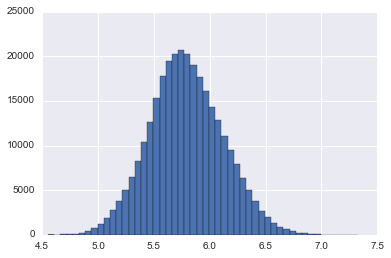

In [4]:
y = train.prime_tot_ttc

print(y.describe())
np.log(y).hist(bins=50);

## Features


* [annee_naissance](#annee_naissance)
* [annee_permis](#annee_permis)
* [marque](#marque)
* [puis_fiscale](#puis_fiscale)
* [anc_veh](#anc_veh)
* [codepostal](#codepostal)
* [energie_veh](#energie_veh)
* [kmage_annuel](#kmage_annuel)
* [crm](#crm)
* [profession](#profession)
* [var1](#var1)
* [var2](#var2)
* [var3](#var3)
* [var4](#var4)
* [var5](#var5)
* [var6](#var6)
* [var7](#var7)
* [var8](#var8)
* [var9](#var9)
* [var10](#var10)
* [var11](#var11)
* [var12](#var12)
* [var13](#var13)
* [var14](#var14)
* [var15](#var15)
* [var16](#var16)
* [var17](#var17)
* [var18](#var18)
* [var19](#var19)
* [var20](#var20)
* [var21](#var21)
* [var22](#var22)
* [age_permis](#age_permis)

In [5]:
df = pd.concat([X, X_test], axis=0)

In [6]:
df.dtypes

annee_naissance    float64
annee_permis       float64
marque              object
puis_fiscale         int64
anc_veh              int64
codepostal          object
energie_veh         object
kmage_annuel         int64
crm                  int64
profession          object
var1               float64
var2                 int64
var3                 int64
var4                 int64
var5                 int64
var6                object
var7                object
var8                object
var9                 int64
var10                int64
var11                int64
var12                int64
var13                int64
var14               object
var15                int64
var16               object
var17                int64
var18                int64
var19                int64
var20                int64
var21                int64
var22                int64
dtype: object

In [7]:
cat_variables = [i for i in df.columns if df[i].dtype == 'O']

In [8]:
print(cat_variables)

['marque', 'codepostal', 'energie_veh', 'profession', 'var6', 'var7', 'var8', 'var14', 'var16']


### `annee_naissance`

Год рождения.

In [9]:
df.annee_naissance.describe()

count    329693.000000
mean       1983.684949
std           6.563537
min        1925.000000
25%        1980.000000
50%        1985.000000
75%        1989.000000
max        1998.000000
Name: annee_naissance, dtype: float64

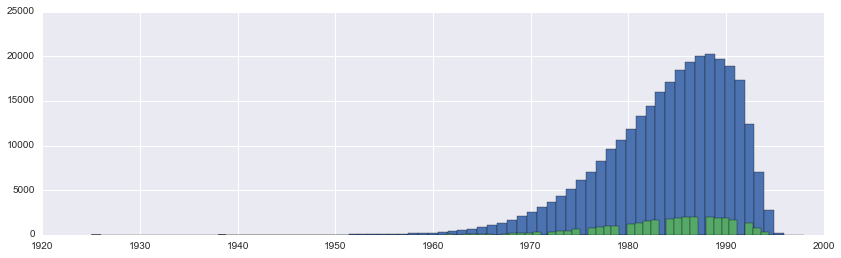

In [10]:
# X.groupby(['annee_naissance'])['annee_naissance'].count()
plt.figure(figsize=(14, 4))
X.annee_naissance.hist(bins = 72);
X_test.annee_naissance.hist(bins = 72);

### `annee_permis`

Год получения прав.

In [14]:
df.annee_permis.describe()

/usr/local/lib/python3.5/dist-packages/numpy/lib/function_base.py:3823: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


count    329693.000000
mean       2003.050847
std           6.590561
min        1944.000000
25%                NaN
50%                NaN
75%                NaN
max        2018.000000
Name: annee_permis, dtype: float64

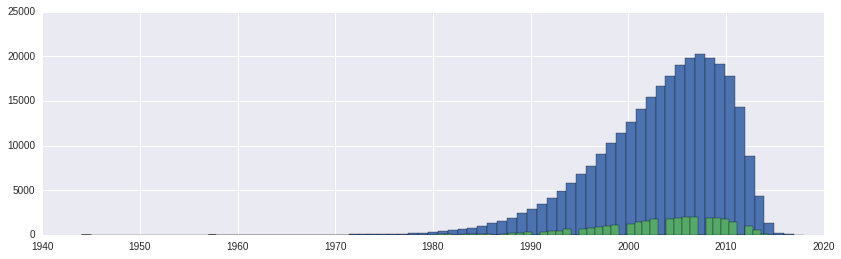

In [16]:
# X.groupby(['annee_permis'])['annee_permis'].count()
plt.figure(figsize=(14, 4))
X.annee_permis.hist(bins = 73);
X_test.annee_permis.hist(bins = 73);

### `age_permis`

Добавим фичу `age_permis` — возраст, в котором были получены права.

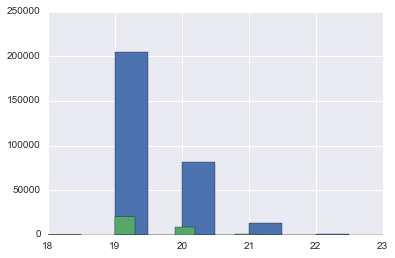

In [11]:
X['age_permis'] = X.annee_permis - X.annee_naissance
X.age_permis.hist();

X_test['age_permis'] = X_test.annee_permis - X_test.annee_naissance
X_test.age_permis.hist();

### `marque`

RENAULT              78454
PEUGEOT              56408
CITROEN              37760
VOLKSWAGEN           21810
OPEL                 14857
FORD                 14177
FIAT                 11942
TOYOTA               11005
MERCEDES              8391
NISSAN                8063
BMW                   7142
AUDI                  6168
SEAT                  5232
SUZUKI                3767
HONDA                 3565
VOLVO                 3432
HYUNDAI               3064
MITSUBISHI            2904
LAND-ROVER            2703
DACIA                 2621
SKODA                 2562
MAZDA                 2432
ALFA ROMEO            2209
MINI                  1856
KIA                   1679
ROVER                 1650
JEEP                  1527
SAAB                  1357
CHRYSLER              1257
LANCIA                1036
                     ...  
EBS                      2
RAYTON FISSORE           2
WIESMANN                 2
ACMA                     2
NECKAR                   2
JIDE                     2
L

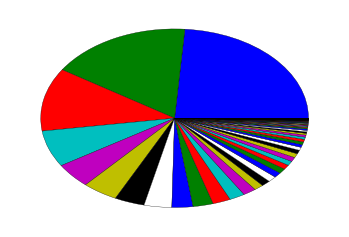

In [17]:
print(df.marque.value_counts())
plt.pie(df.marque.value_counts());

In [12]:
np.sort(df.marque.unique())

array(['ACMA', 'ALFA ROMEO', 'ALPINE RENAULT', 'AMC', 'AMPHICAR', 'ARO',
       'ASIA', 'ASTON MARTIN', 'AUDI', 'AUSTIN', 'AUSTIN-HEALEY',
       'AUTO-UNION', 'AUTOBIANCHI', 'AUTOLAND', 'AUVERLAND', 'BEDFORD',
       'BENTLEY', 'BERTONE', 'BMW', 'BREMACH', 'BRM', 'BUICK', 'CADILLAC',
       'CARBODIES', 'CATERHAM', 'CHENARD ET WALKER', 'CHEVROLET',
       'CHEYENNE', 'CHRYSLER', 'CITROEN', 'COURNIL', 'DACIA', 'DAEWOO',
       'DAF', 'DAIHATSU', 'DAIMLER', 'DANGEL', 'DATSUN', 'DE LOREAN',
       'DELAHAYE', 'DETHLEFFS', 'DODGE', 'DONKERVOORT', 'EAGLE', 'EBRO',
       'EBS', 'ENGIN LOISIRS', 'ENGIN SPECIAL', 'ENGIN TRAVAUX PUBLIC',
       'FERRARI', 'FIAT', 'FORD', 'FSO', 'GEELY', 'GMC', 'GME', 'GRANDIN',
       'HANOMAG', 'HONDA', 'HOTCHKISS', 'HUMMER', 'HYUNDAI', 'INFINITI',
       'INTERNATIONAL', 'ISUZU', 'IVECO', 'JAGUAR', 'JEEP', 'JIDE', 'KIA',
       'LADA', 'LAFER', 'LAMBORGHINI', 'LANCIA', 'LAND-ROVER', 'LDV',
       'LEXUS', 'LINCOLN', 'LOHR', 'LORENZ', 'LOTUS', 'MAHINDRA', 'M

### `puis_fiscale`

Налоговая ставка (на мощность двигателя машины). Зависит от года выпуска машины, лошадей и эмиссии CO2. Обратной силы до 1998 не имеет.

count    330000.000000
mean          6.821433
std           2.634030
min           0.000000
25%           5.000000
50%           6.000000
75%           8.000000
max          58.000000
Name: puis_fiscale, dtype: float64


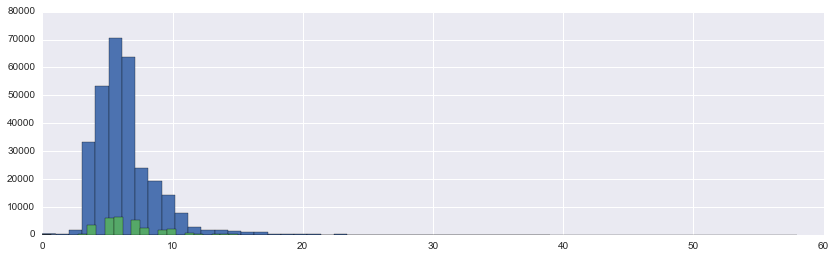

In [13]:
print(df.puis_fiscale.describe());
plt.figure(figsize = (14,4))
X.puis_fiscale.hist(bins = 57);
X_test.puis_fiscale.hist(bins = 57);

In [14]:
# df[df.puis_fiscale > 40]
df[df.puis_fiscale > 50]

,annee_naissance,annee_permis,marque,puis_fiscale,anc_veh,codepostal,energie_veh,kmage_annuel,crm,profession,...,var13,var14,var15,var16,var17,var18,var19,var20,var21,var22
id,,,,,,,,,,,,,,,,,,,,,
47565,1944.0,1963.0,BENTLEY,51,4,14174,essence,14418,50,"enseignant, formateur, chercheur",...,2,F,0,1,3,31,2,1,1,0
74678,1933.0,1952.0,BENTLEY,54,1,24465,essence,17000,55,"enseignant, formateur, chercheur",...,4,F,0,1,2,22,0,0,1,1
162064,1932.0,1951.0,BENTLEY,51,1,54482,essence,14418,50,"agent, employe",...,2,B,3,1,1,29,0,0,0,2
182182,1936.0,1955.0,FERRARI,58,40,62498,essence,12296,50,profession liberale,...,2,A,2,4,1,23,0,0,1,3
220841,1937.0,1956.0,AUDI,51,34,75109,essence,13366,50,"cadre, ingenieur",...,4,G,2,4,4,24,0,1,0,3
240427,1925.0,1944.0,FERRARI,58,4,78650,essence,12296,50,"enseignant, formateur, chercheur",...,2,G,0,1,1,15,0,1,1,1
254274,1947.0,1967.0,BENTLEY,51,2,83137,essence,14418,50,"enseignant, formateur, chercheur",...,2,A,0,1,2,23,0,1,1,1
279724,1942.0,1961.0,BENTLEY,51,2,92051,essence,14543,50,"enseignant, formateur, chercheur",...,2,G,1,1,2,21,0,0,1,2
299719,1943.0,1963.0,ROLLS ROYCE,53,3,97107,essence,14954,50,"enseignant, formateur, chercheur",...,4,N,0,1,1,20,0,1,1,1


### `anc_veh`

Возраст машины.

count    330000.000000
mean         16.206209
std          24.699703
min           0.000000
25%           1.000000
50%           2.000000
75%          31.000000
max          99.000000
Name: anc_veh, dtype: float64


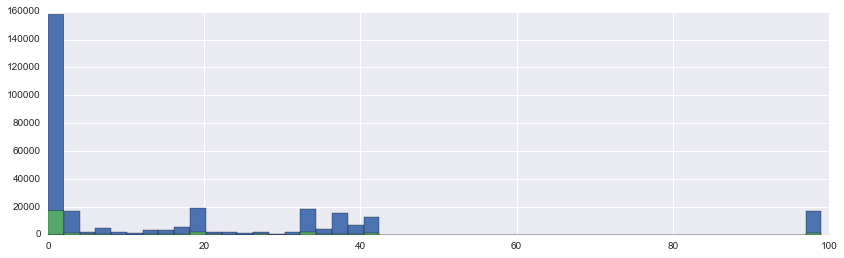

In [15]:
print(df.anc_veh.describe())
plt.figure(figsize = (14, 4))
X.anc_veh.hist(bins = 49);
X_test.anc_veh.hist(bins = 49);

In [18]:
# df[df.anc_veh == 99]
df[df.anc_veh == 99].shape

(18527, 32)

### `codepostal`

Почтовый индекс.

In [15]:
X.codepostal.value_counts()#.head()

13001    2606
6088     2295
31555    2275
35238    1992
20004    1932
44109    1852
97101    1654
34172    1629
1034     1402
67482    1381
13208    1351
87085    1194
38185    1174
33063    1108
97103    1083
13209    1067
20033    1045
29019     980
72181     959
13212     949
49007     926
13213     917
79191     870
54395     863
30189     829
63113     829
83137     805
37261     778
75115     772
80021     770
         ... 
62591       1
60379       1
80761       1
31089       1
34045       1
17473       1
5135        1
45121       1
85196       1
52444       1
58216       1
69077       1
67112       1
82145       1
52036       1
2119        1
54350       1
69012       1
31393       1
89128       1
39076       1
71265       1
12188       1
32042       1
27611       1
90020       1
63094       1
50549       1
78344       1
91098       1
Name: codepostal, dtype: int64

In [16]:
X_test.codepostal.value_counts()

1034     9723
97411    2820
97415    1965
97422    1520
97416    1405
97113    1074
97118     845
97128     729
97413     617
97117     570
97120     561
97414     509
97418     507
97408     506
97125     506
97409     502
97115     495
97129     448
97412     418
97116     404
97404     378
97410     352
97401     311
97124     262
97420     257
97407     218
97114     215
97132     205
97402     202
97405     198
97119     141
97121     134
97111     108
97134     108
97122     107
97112      86
97406      84
97403      77
97423      76
97424      68
97419      55
97109      49
97421      49
97133      43
97417      40
97110      21
97126      18
97131       7
97130       5
97107       2
Name: codepostal, dtype: int64

In [17]:
cat_variables.append('codepostal')

### `energie_veh`

* перевести в factor

gazole             181651
essence            139528
gpl                  7229
hybride essence       854
NR                    430
electricite           308
Name: energie_veh, dtype: int64


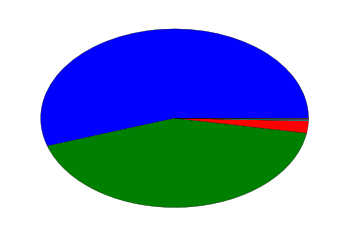

In [19]:
print(df.energie_veh.value_counts())
plt.pie(df.energie_veh.value_counts());

### `kmage_annuel`

Километраж в год.

* кластеризовать (сделать новую переменную)

count    330000.000000
mean       7363.165261
std        3086.819353
min         282.000000
25%        6387.000000
50%        6928.000000
75%        7467.000000
max       17102.000000
Name: kmage_annuel, dtype: float64


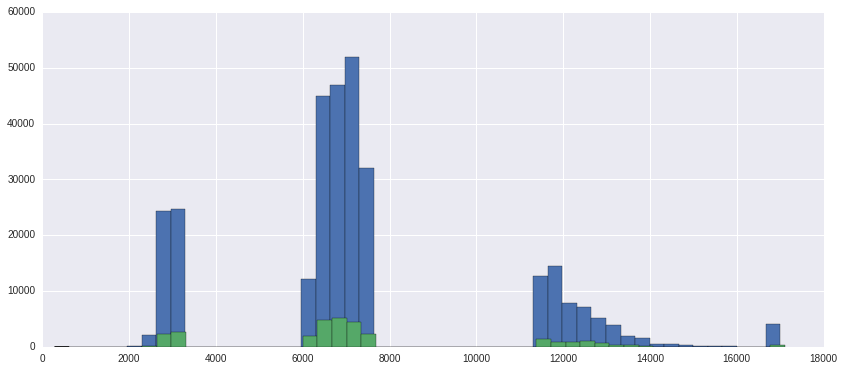

In [31]:
print(df.kmage_annuel.describe())

plt.figure(figsize=(14, 6));
X.kmage_annuel.hist(bins = 50);
X_test.kmage_annuel.hist(bins = 50);

In [24]:
kmage_annuel_ = df.kmage_annuel.values
kmage_annuel_ = kmage_annuel_[kmage_annuel_ < 17000]
kmage_annuel_[kmage_annuel_ > 12000] = kmage_annuel_[kmage_annuel_ > 12000] / 2
kmage_annuel_[kmage_annuel_ > 8000] = kmage_annuel_[kmage_annuel_ > 8000] / 2

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x103340588>]], dtype=object)

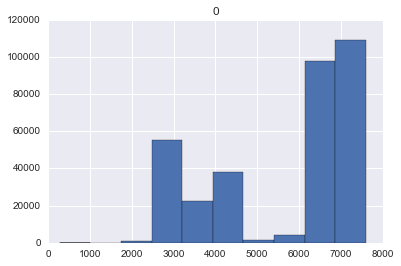

In [25]:
pd.DataFrame(kmage_annuel_).hist()

In [33]:
df[df.kmage_annuel >= 17000].sort_values(by="kmage_annuel")

,annee_naissance,annee_permis,marque,puis_fiscale,anc_veh,codepostal,energie_veh,kmage_annuel,crm,profession,...,var13,var14,var15,var16,var17,var18,var19,var20,var21,var22
id,,,,,,,,,,,,,,,,,,,,,
213,1987.0,2006.0,TOYOTA,5,2,1034,gazole,17000,50,"enseignant, formateur, chercheur",...,5,N,2,1,1,33,2,1,1,0
213202,1983.0,2002.0,CITROEN,6,2,72315,gazole,17000,95,"enseignant, formateur, chercheur",...,5,F,1,1,1,27,0,0,0,1
213217,1981.0,2000.0,RENAULT,4,0,72319,essence,17000,50,"enseignant, formateur, chercheur",...,5,B,1,3,1,29,0,1,1,1
213242,1996.0,2015.0,CITROEN,2,1,72328,essence,17000,50,"enseignant, formateur, chercheur",...,5,B,0,1,1,21,0,1,1,2
213277,1986.0,2006.0,RENAULT,7,0,72329,gpl,17000,72,"enseignant, formateur, chercheur",...,5,B,3,3,1,21,1,0,1,0
213337,1992.0,2011.0,FIAT,3,4,72344,essence,17000,57,"enseignant, formateur, chercheur",...,5,B,1,1,4,23,1,0,1,0
213478,NaN,NaN,NR,0,1,73003,NR,17000,50,"enseignant, formateur, chercheur",...,5,F,0,1,2,23,0,0,1,1
213547,1982.0,2001.0,PEUGEOT,9,0,73008,essence,17000,50,"agent, employe",...,5,D,2,4,1,21,0,0,0,4
213571,1989.0,2009.0,VOLKSWAGEN,9,28,73008,essence,17000,100,technicien,...,5,D,1,3,1,24,0,0,1,1


In [26]:
from sklearn import cluster

In [27]:
kmage_annuel = pd.DataFrame(X['kmage_annuel'])

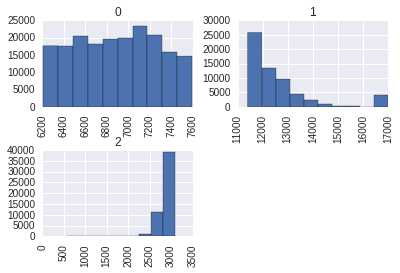

In [29]:
km_3 = cluster.KMeans(n_clusters=3)
km_3.fit(kmage_annuel)

plt.figure(figsize=(14,6))
kmage_annuel.hist(by=km_3.labels_);

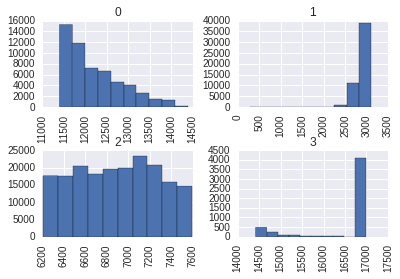

In [30]:
km_4 = cluster.KMeans(n_clusters=4)
km_4.fit(kmage_annuel)

plt.figure(figsize=(14,6))
kmage_annuel.hist(by=km_4.labels_);

### `crm`

Coefficient de Réduction Majoration (CRM), он же bonus malus, т.н. понижающий коэффициент за хорошее вождение. Не может быть меньше 0.5. [Source](http://www.direct-assurance.fr/assurance/assurance-auto/faq-auto/evolution-du-bonus-malus-@/view-161-dafaq.html)

Смело можно делить на `100.0` и получать реальное значение.
Раз CRM - это поправочный коэффициент, то на него можно делить и считать его отдельно от базовой ставки.

count    330000.000000
mean         73.345639
std          23.614768
min          50.000000
25%          50.000000
50%          68.000000
75%          95.000000
max         270.000000
Name: crm, dtype: float64


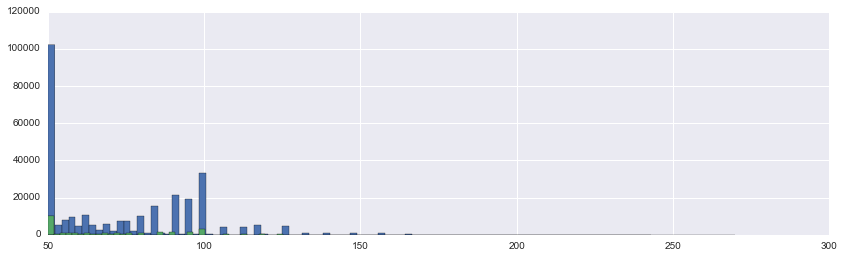

In [26]:
print(df.crm.describe())
plt.figure(figsize=(14,4))
X.crm.hist(bins = 100);
X_test.crm.hist(bins = 100);
# np.log(X.crm).hist();

In [26]:
# X.crm.value_counts()

### `profession`

* перевести в factor

Профессии:

* преподаватель, тренер, исследователь
* агент, сотрудник
* рамки, инженер
* техник
* педагог, ведущий, монитор
* Либеральная профессия
* работник
* работоискатель
* студент
* ремесленник
* профессия в области искусств и развлечений
* мужчина или женщина, у себя дома
* КоммерсантЪ
* Промежуточное профессия здравоохранения и социальной работы в 
* Лидер бизнеса
* Форман, мастерство агент
* оператор фермер

In [27]:
df.profession.value_counts()

enseignant, formateur, chercheur                             122484
agent, employe                                                83801
cadre, ingenieur                                              33151
technicien                                                    16730
educateur, animateur, moniteur                                14592
profession liberale                                           11475
ouvrier                                                       10065
demandeur d'emploi                                             7298
etudiant                                                       6266
artisan                                                        5580
profession de l'information des arts et des spectacles         5012
homme ou femme au foyer                                        4963
commercant                                                     2866
profession intermediaire de la sante et du travail social      2485
chef d'entreprise                               

### `var1`

Судя по всему, стаж вождения.

In [30]:
# pd.DataFrame([X.annee_naissance, X.age_permis, X.var1]).transpose()

In [31]:
# X.var1.isnull().sum()

# var1 = X.var1.fillna(0)

# X[var1 == 0]

# y[var1 == 0]

### `var2`

In [28]:
print(df.var2.isnull().sum())
print(df.var2.value_counts())

0
4    72810
1    70810
5    60927
3    60417
2    59498
0     5538
Name: var2, dtype: int64


### `var3`

In [29]:
print(df.var3.isnull().sum())
print(df.var3.value_counts())

0
372    187804
272    142196
Name: var3, dtype: int64


### `var4`

In [30]:
print(df.var4.isnull().sum())
print(df.var4.value_counts())

0
0    153696
1     61638
2     60989
3     24574
4      9557
5      9556
7      3896
6      3768
9      1744
8       582
Name: var4, dtype: int64


### `var5`

In [32]:
print(df.var5.isnull().sum())
print(df.var5.value_counts())

0
1    190549
2    139451
Name: var5, dtype: int64


### `var6`

In [33]:
print(df.var6.isnull().sum())
print(df.var6.value_counts())

0
B    127920
A     98693
C     83813
D     18978
N       596
Name: var6, dtype: int64


### `var7`

In [34]:
print(df.var7.isnull().sum())
print(df.var7.value_counts())

0
1     169758
3      35802
11     23368
10     23198
4      15106
5      13384
7       9921
8       9189
20      9099
2       8349
6       5007
12      2537
14      2253
13      1552
9        855
0        309
NR       307
50         5
30         1
Name: var7, dtype: int64


### `var8`

In [35]:
print(df.var8.isnull().sum())
print(df.var8.value_counts())

0
M1    101090
B2     74439
M2     58033
H1     25922
B1     25170
T3      8946
T2      7938
F       5915
K       4176
T1      3130
T4      3020
MC      2292
K2      2273
PU      1802
P3      1755
VA      1559
H2      1490
NR       604
TU       407
P1        16
P2        16
P4         5
B          1
K3         1
Name: var8, dtype: int64


### `var9`

In [38]:
print(df.var9.isnull().sum())
print(df.var9.value_counts().head(10))

0
90     30983
60     19426
75     19344
110    18560
115    11736
65     11205
100    10463
105     9473
70      9417
80      7871
Name: var9, dtype: int64


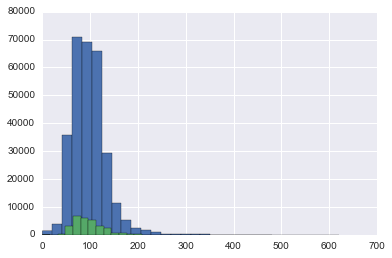

In [36]:
X.var9.hist(bins = 30);
X_test.var9.hist(bins = 30);

### `var10`

In [45]:
print(X.var10.isnull().sum())
print(X.var10.value_counts().head())

0
180    15769
170    12194
185    11967
175    11745
160    10974
Name: var10, dtype: int64


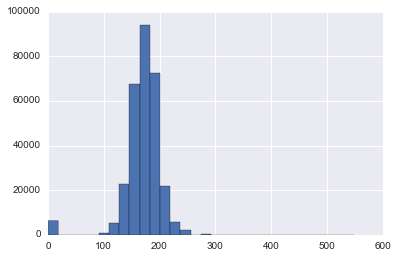

In [46]:
X.var10.hist(bins=30);

### `var11`

In [47]:
print(X.var11.isnull().sum())
print(X.var11.value_counts().head())

0
0     63845
2     49587
1     44320
99    16958
34    14497
Name: var11, dtype: int64


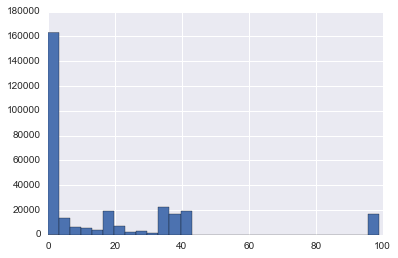

In [48]:
X.var11.hist(bins=30);

### `var12`

In [49]:
print(X.var12.isnull().sum())
print(X.var12.value_counts().head())

0
3211    4121
960     3512
890     3484
980     3384
1300    3224
Name: var12, dtype: int64


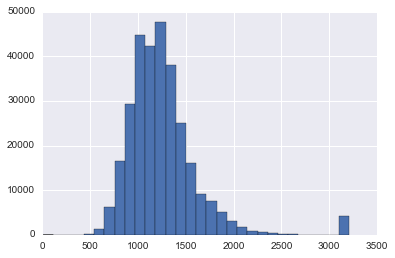

In [50]:
X.var12.hist(bins = 30);

### `var13`

In [51]:
print(X.var13.isnull().sum())
print(X.var13.value_counts())

0
5    180716
3     69632
4     29832
2     19820
Name: var13, dtype: int64


### `var14`

In [52]:
print(X.var14.isnull().sum())
print(X.var14.value_counts())

0
A    62469
B    62449
F    46276
G    45126
C    34351
D    32757
E    11505
N     5067
Name: var14, dtype: int64


In [53]:
cat_variables.append('var14')

### `var15`

In [54]:
print(X.var15.isnull().sum())
print(X.var15.value_counts())

0
0    107347
2     98212
1     55596
3     29408
4      6985
5      1662
6       537
7       147
8        78
9        28
Name: var15, dtype: int64


### `var16`

In [55]:
print(X.var16.isnull().sum())
print(X.var16.value_counts())

0
1     157270
4      99301
5      16958
3      16880
2       5917
0       3345
NR       329
Name: var16, dtype: int64


In [56]:
cat_variables.append('var16')

### `var17`

In [57]:
print(X.var17.isnull().sum())
print(X.var17.value_counts())

0
1    189634
2     69401
4     31959
3      7062
0      1789
5       155
Name: var17, dtype: int64


### `var18`

In [58]:
print(X.var18.isnull().sum())
print(X.var18.value_counts())

0
23    36281
22    34870
24    33843
25    29404
21    28001
26    25553
27    20606
28    15433
20    15372
29    11151
30     7953
31     6451
19     5720
32     4956
33     3925
34     3132
35     2401
36     1933
37     1724
38     1517
39     1155
14      797
13      756
15      675
12      644
40      572
16      551
11      545
18      480
17      472
10      433
9       348
8       289
41      281
7       273
4       241
5       230
6       230
3       193
1       150
2       144
42      132
0        90
43       55
44       31
45        7
Name: var18, dtype: int64


### `var19`

In [59]:
print(X.var19.isnull().sum())
print(X.var19.value_counts())

0
0     210146
1      47692
2      24855
3      10148
4       3978
5       1537
6        662
7        362
8        237
9        125
11        63
10        47
12        32
13        27
15        16
14        15
16        14
20        14
17         9
18         6
19         3
27         3
25         2
34         2
32         1
21         1
23         1
24         1
28         1
Name: var19, dtype: int64


### `var20`

In [15]:
print(df.var20.isnull().sum())
print(df.var20.value_counts())

0
1    175294
0    154706
Name: var20, dtype: int64


### `var21`

In [10]:
print(df.var21.isnull().sum())
print(df.var21.value_counts())

0
1    299079
0     30921
Name: var21, dtype: int64


### `var22`

In [11]:
print(df.var22.isnull().sum())
print(df.var22.value_counts())

0
0     126690
1     104232
2      61316
3      24108
4       8271
5       3037
6       1179
7        497
8        251
9        149
10       106
11        44
13        39
12        28
14        20
15         8
17         8
22         4
25         3
60         3
18         2
30         2
59         1
16         1
20         1
Name: var22, dtype: int64


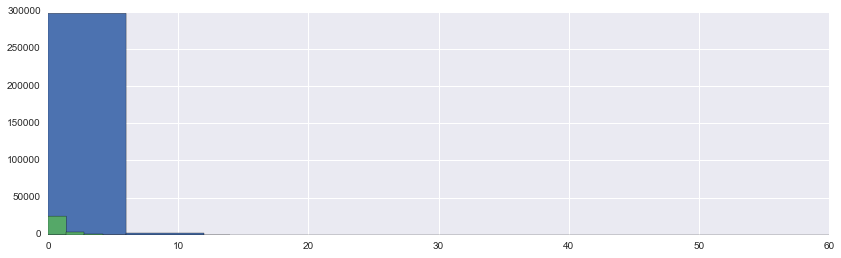

In [14]:
plt.figure(figsize = (14, 4))
X.var22.hist(bins = 10);
X_test.var22.hist(bins = 10);

-----

In [63]:
from sklearn.preprocessing import LabelEncoder

In [64]:
encods = [LabelEncoder() for col in cat_variables]

for i, col in enumerate(cat_variables):
    X[col] = encods[i].fit_transform(X[col].astype(str))

encods = [LabelEncoder() for col in cat_variables]

for i, col in enumerate(cat_variables):
    X_test[col] = encods[i].fit_transform(X_test[col].astype(str))

In [66]:
X.fillna(0, inplace = True)
X_test.fillna(0, inplace = True)

---------

Зафигачить `xgboost`.

```python
import xgboost as xgb
# read in data
dtrain = xgb.DMatrix('demo/data/agaricus.txt.train')
dtest = xgb.DMatrix('demo/data/agaricus.txt.test')
# specify parameters via map
param = {'max_depth':2, 'eta':1, 'silent':1, 'objective':'binary:logistic' }
num_round = 2
bst = xgb.train(param, dtrain, num_round)
# make prediction
preds = bst.predict(dtest)
```

In [67]:
import xgboost as xgb

In [68]:
dtrain = xgb.DMatrix(X, y, missing=0)

dtest = xgb.DMatrix(X_test)

In [69]:
# человеческая метрика
def mape2(preds, dtrain):
    y_true = dtrain.get_label()
    return 'mape2', np.mean(np.abs((y_true - preds) / y_true))

In [70]:
param = { }
num_round = 100
bst = xgb.train(param, dtrain, num_round)

In [71]:
pred = bst.predict(dtest)

In [72]:
from datetime import datetime

filename = 'xgb_' + datetime.now().strftime(format = '%d%m_%H%M') + '.csv'
pd.DataFrame({'id': X_test.index, 'pred': pred}).to_csv(filename,
                                                        index=False,
                                                        sep=';')

In [73]:
# xgb.cv(params = param, 
#        dtrain = dtrain, 
#        num_boost_round=num_round, 
#        early_stopping_rounds = 30,
#        feval = mape2
#       )

In [24]:
df.corr()

,annee_naissance,annee_permis,puis_fiscale,anc_veh,kmage_annuel,crm,var1,var2,var3,var4,...,var11,var12,var13,var15,var17,var18,var19,var20,var21,var22
annee_naissance,1.000000,0.996143,-0.398639,0.019380,-0.226223,0.090048,-0.996143,0.001054,-0.012797,0.001607,...,0.019483,-0.211251,0.016517,-0.008414,0.004960,0.003789,0.002739,0.003463,0.003881,0.001245
annee_permis,0.996143,1.000000,-0.397199,0.019577,-0.225365,0.089981,-1.000000,0.000946,-0.013068,0.001531,...,0.019686,-0.210426,0.016416,-0.008516,0.005102,0.003490,0.002769,0.003800,0.003798,0.001299
puis_fiscale,-0.398639,-0.397199,1.000000,-0.048875,0.550662,-0.220577,0.397199,-0.006038,0.030855,-0.000201,...,-0.048911,0.502540,-0.049966,0.020973,0.001691,-0.002109,-0.002368,-0.002763,-0.004814,-0.000959
anc_veh,0.019380,0.019577,-0.048875,1.000000,-0.047073,0.194077,-0.019577,0.084763,-0.464505,0.001718,...,0.999000,-0.045668,-0.023700,-0.087719,-0.006501,0.006293,-0.000468,0.007906,0.002668,0.004622
kmage_annuel,-0.226223,-0.225365,0.550662,-0.047073,1.000000,-0.224395,0.225365,-0.026452,0.024888,0.001566,...,-0.046971,0.908860,0.211771,0.057796,0.000751,-0.005235,0.000025,0.001346,-0.002637,-0.000589
crm,0.090048,0.089981,-0.220577,0.194077,-0.224395,1.000000,-0.089981,0.142801,-0.087593,-0.000959,...,0.193985,-0.212965,-0.038970,-0.014027,0.003771,-0.007480,0.000659,0.002201,0.003727,-0.002629
var1,-0.996143,-1.000000,0.397199,-0.019577,0.225365,-0.089981,1.000000,-0.000946,0.013068,-0.001531,...,-0.019686,0.210426,-0.016416,0.008516,-0.005102,-0.003490,-0.002769,-0.003800,-0.003798,-0.001299
var2,0.001054,0.000946,-0.006038,0.084763,-0.026452,0.142801,-0.000946,1.000000,-0.075047,0.000438,...,0.084833,-0.029169,-0.024901,0.023020,0.000599,0.000517,-0.002665,-0.000222,0.002383,0.004090
var3,-0.012797,-0.013068,0.030855,-0.464505,0.024888,-0.087593,0.013068,-0.075047,1.000000,-0.002824,...,-0.465736,0.026255,0.024712,0.024436,0.000286,-0.001876,-0.002643,-0.003683,0.000446,-0.003142
var4,0.001607,0.001531,-0.000201,0.001718,0.001566,-0.000959,-0.001531,0.000438,-0.002824,1.000000,...,0.001792,0.001910,0.001447,-0.002747,0.001802,-0.002051,0.000607,-0.000943,-0.001894,0.000338


In [79]:
X.corrwith(y)

annee_naissance    0.053629
annee_permis       0.053594
marque             0.056387
puis_fiscale      -0.087858
anc_veh           -0.113175
codepostal         0.038251
energie_veh        0.067854
kmage_annuel       0.017368
crm                0.672603
profession         0.018608
var1              -0.158137
var2               0.082028
var3               0.070001
var4               0.137481
var5              -0.164251
var6              -0.014386
var7              -0.061064
var8               0.006371
var9              -0.017677
var10              0.095162
var11             -0.112625
var12             -0.055526
var13              0.051978
var14              0.016385
var15              0.027815
var16             -0.058579
var17              0.005639
var18             -0.008995
var19             -0.003160
var20              0.001241
var21              0.000776
var22             -0.002512
age_permis         0.036013
dtype: float64